# Titanic Survival Prediction

## 1) Data acquisition
Download the data from this link : https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd

df_train = pd.read_csv('data/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2) Data description
Try to get the main information about the dataset

In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


La signification et caractéristiques de chaque variable :
- PassengerId : Identifiant de l'individu. C'est un attribut de type int
- Survived : Indique si l'individu a survécu. 1 pour oui, 0 pour non.
- Pclass : Désigne la classe dans laquelle se trouve l'individu sur le parquebot. Il est en première classe avec la valeur 1, ou deuxième classe avec la valeur 2 ou en troisième avec la valeur 3
- Name : Désigne le nom de l'individu. Il est de type string
- Sex : Désigne le sexe de l'individu. Il est de type string mais ne contient que deux valeurs que sont "male" pour homme et "female" pour femme
- Age : Désigne l'âge de l'individu
- SibSp : Désigne le nombre de frères/soeurs ou d'époux/épouses de l'individu présents sur le parquebot
- Parch : Désigne le nombre de parents/enfants de l'individu présents sur le parquebot
- Ticket : Désigne le numéro de ticket de l'indivdu
- Fare : Désigne le tarif que le passager devait payer
- Cabin : Numéro de cabine dans laquelle se trouve l'individu
- Embarked : Désigne la provenance d'embarcation de l'individu. Les valeurs possibles sont C pour Cherbourg, Q pour Queenstown et S pour Southampton
Quand on n'a pas d'informations sur un des attributs d'un individu, il est marqué "nan"
Source : voir le lien kaggle dans la section "Data Dictionary" de l'onglet "Data"

In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Ici sont affichées les statistiques sur chaque donnée et attribut.
Il faut remarquer que les attributs "age", "fare" et "cabin" contiennent des nan dans le jeu d'entraînement
Certaines statistiques ne sont pas nécessaires ou logiques comme faire la moyenne ou le max sur passengerId

## 3) Exploratory data analysis
For every data science project, the most important part is understanding the data.
Exploratory data anaylysis is an analysis approach that identifies general patterns in the data. Try to learn as much as you can about the dataset :

In [4]:
# TO-DO : Separate the dataset to 2 dataset : one for numerical data and one for categorical data
df_num = df_train[[ i for i in df_train.columns if (df_train[i].dtypes==df_train['PassengerId'].dtypes or df_train[i].dtypes==df_train['Fare'].dtypes) and i != 'PassengerId']]
df_cat = df_train[[ j for j in df_train.columns if j not in ['PassengerId','Age','Parch','SibSp','Fare']]]

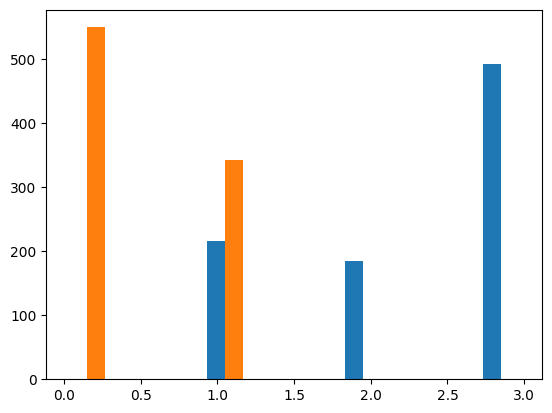

In [5]:
# TO-DO : Using matplotlib histograms, draw the distributions for numerical data
import matplotlib.pyplot as plt
Pclass_hist = plt.hist(df_num[['Pclass','Survived']])
plt.show()




<Axes: >

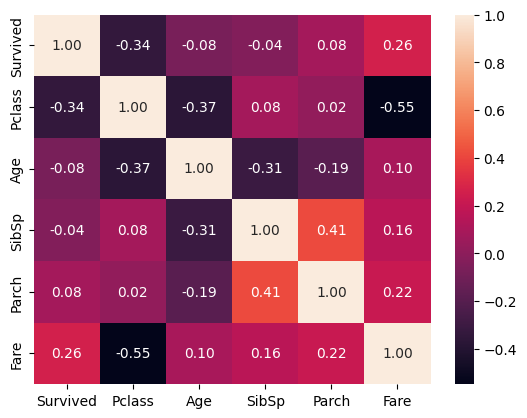

In [6]:
# TO-DO : Using seaborn, draw the heatmap for the correlation matrix and explain its role
import seaborn as sns
sns.heatmap(df_num.corr(), annot=True, fmt=".2f")

In [7]:
# TO-DO : 
    # Look up pivot tables in pandas and explain what they do
    # draw them for the numerical variables with a mean aggrregation
#Les tableaux croisés dynamiques permettent d'afficher le résultat d'une agrégation de valeurs pour un attribut en fonction plusieurs autres attributs
table_num = pd.pivot_table(df_num,values=['SibSp','Parch','Fare','Age'],index=['Survived','Pclass'],aggfunc=['mean','max'])
table_num

mean                                  max            \
                       Age       Fare     Parch     SibSp   Age      Fare   
Survived Pclass                                                             
0        1       43.695312  64.684007  0.300000  0.287500  71.0  263.0000   
         2       33.544444  19.412328  0.144330  0.319588  70.0   73.5000   
         3       26.555556  13.669364  0.384409  0.672043  74.0   69.5500   
1        1       35.368197  95.608029  0.389706  0.492647  80.0  512.3292   
         2       25.901566  22.055700  0.643678  0.494253  62.0   65.0000   
         3       20.646118  13.694887  0.420168  0.436975  63.0   56.4958   

                             
                Parch SibSp  
Survived Pclass              
0        1          4     3  
         2          2     2  
         3          6     8  
1        1          2     3  
         2          3     3  
         3          5     4

<Axes: xlabel='Sex', ylabel='Survived'>

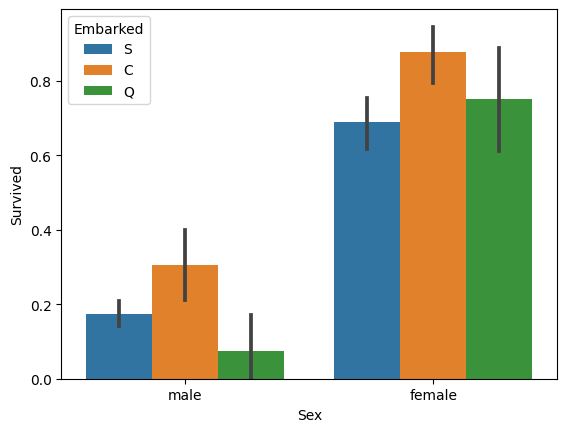

In [8]:
# TO-DO : Using sns barplot, draw the barplots for the categorical variables
sns.barplot(df_cat,x='Sex',y='Survived',hue='Embarked')

In [9]:
# TO-DO : 
    # Create the pivot table for the categorical variables for which it makes sense
    # Explain why it doesn not make sense for the others
table_cat = pd.pivot_table(df_cat,values='Survived',index=['Sex','Pclass'],aggfunc='mean')
table_cat

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

Il est tout à fait naturel de mesurer la proportion de survie par rapport au sexe et la classe de voyage car ce sont deux attributs qui déterminent fortement la catégorie d'un individu.
Par contre, cela ne fait aucun sens de vérifier le ticket car on connaît déjà la classe de voyage de l'individu. Donc c'est une information redondante. 
Egalement, il n'est pas nécessaire d'afficher le nom puisqu'on ne fera pas d'analyse là-dessus. 
Aussi, il n'est pas nécessaire de tenir compte du lieu d'embarcation pour les prédictions car d'un point d'embarcation, on peut ressortir plusieurs individus de plusieurs classes de voyage.

In [10]:
# TO-DO : 
    # Explore the variable Cabin's values
    # Can we use this variable directly? if not, how can we exploit it efficiently
print(df_cat['Cabin'])


0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object


Cette colonne contient la zone du parquebot dans laquelle se trouvait chaque individu au moment de l'évacuation. Elle pourrait servir pour se rendre compte des différences entre individus au moment de l'évacuation et pour trouver ceux qui y ont survécu. Elle est plus informative que le lieu d'embarcation car d'elle, on peut ressortir directement ceux qui ont pu survivre.

## 4) Data Engineering
When exploiting datasets, data engineering is an important preprocessing step. Its goal is to extract more information from the data so to increase the predictive power of the machine learning model.
Identify some variables on which we can apply data engineering and explain what type of information can be extratced from them.

In [11]:
# Here is an example of data engineering from the variable Cabin, we used it to create a new variable called Cabin_multiple that contains the number of cabins per passenger.
df_train['Cabin_multiple'] = df_train.Cabin.apply(lambda x : 0 if pd.isna(x) else len(x.split(' ')))
df_train['Cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin_multiple, dtype: int64

In [12]:
# TO-DO : Create the pivot table for the newly created attribute.
table_train = pd.pivot_table(df_train,index='Cabin_multiple',aggfunc='mean')
table_train

C:\Users\William\AppData\Local\Temp\ipykernel_23072\740568502.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  table_train = pd.pivot_table(df_train,index='Cabin_multiple',aggfunc='mean')


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Cabin_multiple,,,,,,,
0,27.555293,19.157325,0.365357,443.208151,2.639010,0.547307,0.299854
1,37.151235,64.409469,0.311111,457.055556,1.177778,0.372222,0.677778
2,24.794667,115.317700,1.125000,445.375000,1.500000,0.562500,0.562500
3,33.166667,261.554867,1.833333,408.500000,1.000000,1.666667,0.500000
4,19.500000,262.375000,2.000000,527.500000,1.000000,2.000000,1.000000


In [13]:
# TO-DO : Create the variables you think might be interesting then draw the pivot tables for the variables you create


## 5) Data Preperation
All of the operations done so far were done on the training set. However, when we test our model, the test data needs to have the same format as the training data (the created variables, the deleted variables, ...).

### 5.1) Data transformation:
A quick way to do that, is to combine both datasets and apply the operations applied previously on the combined dataset.

In [14]:
df_test = pd.read_csv('data/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
import numpy as np
df_train['train'] = 1
df_test['train'] = 0
df_test['Survived'] = np.NaN
df_all = pd.concat([df_train, df_test])
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_multiple,train
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,1


In [16]:
# TO-DO : Use the .info() function from pandas and get the information about the dataset after the changes
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   int64  
 3   Name            1309 non-null   object 
 4   Sex             1309 non-null   object 
 5   Age             1046 non-null   float64
 6   SibSp           1309 non-null   int64  
 7   Parch           1309 non-null   int64  
 8   Ticket          1309 non-null   object 
 9   Fare            1308 non-null   float64
 10  Cabin           295 non-null    object 
 11  Embarked        1307 non-null   object 
 12  Cabin_multiple  891 non-null    float64
 13  train           1309 non-null   int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 153.4+ KB


In [17]:
df_all['Age'] = df_all['Age'].fillna(df_all['Age'].median())
df_all['Fare'] = df_all['Fare'].fillna(df_all['Fare'].median())

### 5.2) Handling missing data : 
There are different ways to handle missing data in a dataset. Name some of them.

List the variables with missing values.

For every variable named, handle the missing variables in the way you see fits.

Pour gérer les cas des infos manquantes, on peut :
- Supprimer les données qui ont des infos manquantes. Dans notre cas, ce n'est pas conseillé étant donné qu'on veut faire des prédictions.
- Remplacer les infos par de nouvelles infos. Dans le cas des nombres, on peut utiliser 0, la moyenne, la valeur maximale ou la médiane ou l'écart-type (variance). Pour les valeurs str, on peut mettre le champ à "". Cependant, si on devait faire de l'analyse de texte, ce ne serait pas conseillé.
Dans notre cas, ce sont les attributs "cabin" et "embarked" qui ont des infos non renseignées.

In [18]:
df_all['Cabin'] = df_all['Cabin'].fillna('')
df_all['Embarked'] = df_all['Embarked'].fillna('')
df_all['Cabin_multiple'] = df_all['Cabin_multiple'].fillna(0)

### 5.3) Categorical variables transformation : 
Fully connected neural networks (FCNNs) are known for not being able to handle categorical variables in their natural state.

Using one hot encoding (.get dummies function from pandas), create a new version of the dataset with transformed categorical variables.

In [19]:
# First, we transform the Pclass variable to string because it is a categorical variable
df_all['Pclass'] = df_all['Pclass'].astype(str)
df_all = df_all.drop(columns=['Fare'])
#Récupération des données par titre
## Exemple d'une donnée
exemple = df_all['Name'].values[3]
start = exemple.find(',')
end = exemple.find('.')
res = exemple[start + len(',') + 1: end]
print(res)

## Fonction de récupération de titre
"""Fonction permettant de récupérer le titre d'un individu dans le titanic"""
def get_title(str):
    start=str.find(',')
    end=str.find('.')
    return str[start+len(',')+1:end]

titles = set()

for i in range(df_all.shape[0]):
    titles.add(get_title(df_all['Name'].values[i]))

for title in titles:
    df_all[title]=df_all.Name.apply(lambda x:1 if get_title(x)==title else 0)

Mrs


In [20]:

# TO-DO : One hot encoding
df_encoded = pd.get_dummies(df_all,columns=['Sex','Embarked'],drop_first=True)

In [21]:
# TO-DO : Get the information for the newly created dataset
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   object 
 3   Name            1309 non-null   object 
 4   Age             1309 non-null   float64
 5   SibSp           1309 non-null   int64  
 6   Parch           1309 non-null   int64  
 7   Ticket          1309 non-null   object 
 8   Cabin           1309 non-null   object 
 9   Cabin_multiple  1309 non-null   float64
 10  train           1309 non-null   int64  
 11  Sir             1309 non-null   int64  
 12  Rev             1309 non-null   int64  
 13  Col             1309 non-null   int64  
 14  Dona            1309 non-null   int64  
 15  Mme             1309 non-null   int64  
 16  Mrs             1309 non-null   int64  
 17  Lady            1309 non-null   in

In [22]:
# TO-DO : Create a second version of the dataset from the one previously created but without the variables you created with data engineering
new_dataset = df_encoded
new_dataset= new_dataset.drop(columns=['Cabin','Name','Ticket','PassengerId'])

In [128]:
# TO-DO : Separate the training data from the test data
train = new_dataset.loc[new_dataset['train']==1]
test = new_dataset.loc[new_dataset['train']==0]

X_train = train.loc[:,train.columns!='Survived']
X_train = X_train.drop(columns=['train'])
X_test = test.loc[:,test.columns!='Survived']
X_test = X_test.drop(columns=['train'])



Y_train = train.loc[:,train.columns.isin(['Survived'])]

print(X_train.shape, Y_train.shape)
print(X_test.shape)

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train.info()

(891, 27) (891, 1)
(418, 27)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             891 non-null    float64
 1   SibSp           891 non-null    int64  
 2   Parch           891 non-null    int64  
 3   Cabin_multiple  891 non-null    float64
 4   Sir             891 non-null    int64  
 5   Rev             891 non-null    int64  
 6   Col             891 non-null    int64  
 7   Dona            891 non-null    int64  
 8   Mme             891 non-null    int64  
 9   Mrs             891 non-null    int64  
 10  Lady            891 non-null    int64  
 11  Miss            891 non-null    int64  
 12  Mlle            891 non-null    int64  
 13  Ms              891 non-null    int64  
 14  Capt            891 non-null    int64  
 15  Jonkheer        891 non-null    int64  
 16  Major           891 non-null    int64  
 17  the Co

Les données d'entraînement contiennent deux variables numériques et d'autres variables catégorielles. Elles ne contiennent pas la variable "survived" car c'est la variable cible et c'est elle qu'on veut prédire.

In [24]:
# TO-DO : Separate the training data from the test data for the dataset without variables that are feature engineered

X_train_bis = df_all.loc[:,df_all.columns!='Survived']
X_train_bis = X_train_bis.loc[X_train_bis['train']==1]
X_test_bis = df_all.loc[:,df_all.columns!='Survived']
X_test_bis = X_test_bis.loc[X_test_bis['train']==0]
print(X_train_bis.shape, Y_train.shape)
print(X_test_bis.shape)

(891, 30) (891, 1)
(418, 30)


## 6) Model Creation
Using keras, create a Neural Network and train it on the data generated. 

In [170]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# TO-DO : Model creation
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Dropout(0.25))
model.add(Dense(64))
model.add(Dense(1,activation='sigmoid'))

# TO-DO : Model training 

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()


Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_225 (Dense)           (None, 512)               15360     
                                                                 
 dropout_145 (Dropout)       (None, 512)               0         
                                                                 
 dense_226 (Dense)           (None, 512)               262656    
                                                                 
 dropout_146 (Dropout)       (None, 512)               0         
                                                                 
 dense_227 (Dense)           (None, 16)                8208      
                                                                 
 dropout_147 (Dropout)       (None, 16)                0         
                                                                 
 dense_228 (Dense)           (None, 1)               

In [171]:
history = model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
28/28 [==============================] - 1s 7ms/step - loss: 1.4464 - accuracy: 0.5791
Epoch 2/50
28/28 [==============================] - 0s 6ms/step - loss: 0.9858 - accuracy: 0.6476
Epoch 3/50
28/28 [==============================] - 0s 6ms/step - loss: 0.9904 - accuracy: 0.6801
Epoch 4/50
28/28 [==============================] - 0s 6ms/step - loss: 0.7043 - accuracy: 0.7295
Epoch 5/50
28/28 [==============================] - 0s 6ms/step - loss: 0.6119 - accuracy: 0.7598
Epoch 6/50
28/28 [==============================] - 0s 6ms/step - loss: 0.5541 - accuracy: 0.7890
Epoch 7/50
28/28 [==============================] - 0s 6ms/step - loss: 0.5279 - accuracy: 0.7811
Epoch 8/50
28/28 [==============================] - 0s 6ms/step - loss: 0.5591 - accuracy: 0.7823
Epoch 9/50
28/28 [==============================] - 0s 5ms/step - loss: 0.5145 - accuracy: 0.7912
Epoch 10/50
28/28 [==============================] - 0s 6ms/step - loss: 0.4936 - accuracy: 0.7789
Epoch 11/50
28/28 [

In [139]:
# This code transforms the results to binary (0 or 1) from the probabilities predicted by the model
pred_val = (model.predict(X_test) > 0.5).astype(int).flatten()
len(pred_val)

14/14 [==============================] - 0s 3ms/step


418

In [140]:
# This code formats the results to a submission format (Call the lab assistant to learn more about this !)
formated_results = {'PassengerId' : df_test['PassengerId'], 'Survived' : pred_val}
formated_results = pd.DataFrame(formated_results)
formated_results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [141]:
# Saving the results in a csv file
formated_results.to_csv('data/titanic/results.csv', index = False)